In [54]:
using Plots
using LinearAlgebra

file = open("v1.txt", "r");
s = read(file, String);
close(file);
v1 = reshape(parse.(Int64, split(s)),(3000,1));
file = open("v2.txt", "r");
s = read(file, String);
close(file);
v2 = reshape(parse.(Int64, split(s)),(3000,1));

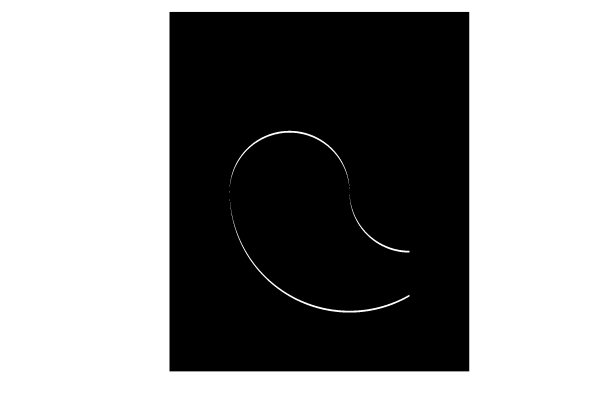

In [2]:
A = zeros(6000,5000)
for i = 1:3000
    A[v1[i]-15:v1[i]+15,1000+i] .= 1
    A[v2[i]-15:v2[i]+15,1000+i] .= 1
end
gr()
heatmap(A, yflip=true, aspect_ratio=:equal, color=:gist_gray, cbar=:none,framestyle=:none)
#savefig("heatmap.png")

In [23]:
function Fit_bt_Sin_Cos(T,v)
    lambda = 2
    n_digree = 35
    b = zeros(3000+n_digree-1)
    b[1:3000] = v
    data_arr = zeros(3000+n_digree-1,n_digree)
    for i = 1 : 3000
        data_arr[i,1]  = 1
        data_arr[i,2]  = sin(2 * pi * i / T)
        data_arr[i,3]  = sin(2 * pi * i / (T*(k^1)))
        data_arr[i,4]  = sin(2 * pi * i / (T*(k^2)))
        data_arr[i,5]  = sin(2 * pi * i / (T*(k^3)))
        data_arr[i,6]  = sin(2 * pi * i / (T*(k^4)))
        data_arr[i,7]  = sin(2 * pi * i / (T*(k^5)))
        data_arr[i,8]  = sin(2 * pi * i / (T*(k^6)))
        data_arr[i,9]  = sin(2 * pi * i / (T*(k^7)))
        data_arr[i,10] = sin(2 * pi * i / (T*(k^8)))
        data_arr[i,11] = sin(2 * pi * i / (T/(k^1)))
        data_arr[i,12] = sin(2 * pi * i / (T/(k^2)))
        data_arr[i,13] = sin(2 * pi * i / (T/(k^3)))
        data_arr[i,14] = sin(2 * pi * i / (T/(k^4)))
        data_arr[i,15] = sin(2 * pi * i / (T/(k^5)))
        data_arr[i,16] = sin(2 * pi * i / (T/(k^6)))  
        data_arr[i,17] = sin(2 * pi * i / (T/(k^7)))
        data_arr[i,18] = sin(2 * pi * i / (T/(k^8)))
        data_arr[i,19] = sin(2 * pi * i / T)
        data_arr[i,20] = cos(2 * pi * i / (T*(k^1)))
        data_arr[i,21] = cos(2 * pi * i / (T*(k^2)))
        data_arr[i,22] = cos(2 * pi * i / (T*(k^3)))
        data_arr[i,23] = cos(2 * pi * i / (T*(k^4)))
        data_arr[i,24] = cos(2 * pi * i / (T*(k^5)))
        data_arr[i,25] = cos(2 * pi * i / (T*(k^6)))
        data_arr[i,26] = cos(2 * pi * i / (T*(k^7)))
        data_arr[i,27] = cos(2 * pi * i / (T*(k^8)))
        data_arr[i,28] = cos(2 * pi * i / (T/(k^1)))
        data_arr[i,29] = cos(2 * pi * i / (T/(k^2)))
        data_arr[i,30] = cos(2 * pi * i / (T/(k^3)))
        data_arr[i,31] = cos(2 * pi * i / (T/(k^4)))
        data_arr[i,32] = cos(2 * pi * i / (T/(k^5)))
        data_arr[i,33] = cos(2 * pi * i / (T/(k^6))) 
        data_arr[i,34] = cos(2 * pi * i / (T/(k^7)))
        data_arr[i,35] = cos(2 * pi * i / (T/(k^8)))
    end
    for i = 2 : n_digree
        data_arr[i+3000-1,i] = i
    end
    model = data_arr \ b;
    pred = data_arr[1:3000,:] * model;
    loss = (sum((pred-v).^2)/3000)^0.5
    return model,loss,pred
end
    

Fit_bt_Sin_Cos (generic function with 1 method)

In [45]:
T1 = 4000
k = 1.2
model1,loss1,pred1 = Fit_bt_Sin_Cos(T1,v1);
println("Root mean squared loss of fitted curve on v1 is ", string(loss1))

Root mean squared loss of fitted curve on v1 is 60.73365435142669


In [36]:
plot(pred1,itle = "V1 points and fitted curve", label= "fitted curve", grid = true , xlabel  = "x axis", ylabel = "y axis")
plot!(v1,label= "v1")
savefig("V1_fit.png")

In [46]:
T2 = 8000
model2,loss2,pred2 = Fit_bt_Sin_Cos(T2,v2)
println("Root mean squared loss of fitted curve on v2 is ", string(loss2))

Root mean squared loss of fitted curve on v2 is 41.78805497174969


In [37]:
plot(pred2,title = "V2 points and fitted curve", label= "fitted curve", grid = true , xlabel  = "x axis", ylabel = "y axis")
plot!(v2,label= "v2")
savefig("V2_fit.png")

In [28]:
function create_new_curve(v,model,T)
    new_v = zeros(4000)
    new_v[1:3000] = v
    n_digree = 35
    data_arr = zeros(1000,n_digree)
    for i = 3001 : 4000
        data_arr[i-3000,1]  = 1
        data_arr[i-3000,2]  = sin(2 * pi * i / T)
        data_arr[i-3000,3]  = sin(2 * pi * i / (T*(k^1)))
        data_arr[i-3000,4]  = sin(2 * pi * i / (T*(k^2)))
        data_arr[i-3000,5]  = sin(2 * pi * i / (T*(k^3)))
        data_arr[i-3000,6]  = sin(2 * pi * i / (T*(k^4)))
        data_arr[i-3000,7]  = sin(2 * pi * i / (T*(k^5)))
        data_arr[i-3000,8]  = sin(2 * pi * i / (T*(k^6)))
        data_arr[i-3000,9]  = sin(2 * pi * i / (T*(k^7)))
        data_arr[i-3000,10] = sin(2 * pi * i / (T*(k^8)))
        data_arr[i-3000,11] = sin(2 * pi * i / (T/(k^1)))
        data_arr[i-3000,12] = sin(2 * pi * i / (T/(k^2)))
        data_arr[i-3000,13] = sin(2 * pi * i / (T/(k^3)))
        data_arr[i-3000,14] = sin(2 * pi * i / (T/(k^4)))
        data_arr[i-3000,15] = sin(2 * pi * i / (T/(k^5)))
        data_arr[i-3000,16] = sin(2 * pi * i / (T/(k^6)))  
        data_arr[i-3000,17] = sin(2 * pi * i / (T/(k^7)))
        data_arr[i-3000,18] = sin(2 * pi * i / (T/(k^8)))
        data_arr[i-3000,19] = sin(2 * pi * i / T)
        data_arr[i-3000,20] = cos(2 * pi * i / (T*(k^1)))
        data_arr[i-3000,21] = cos(2 * pi * i / (T*(k^2)))
        data_arr[i-3000,22] = cos(2 * pi * i / (T*(k^3)))
        data_arr[i-3000,23] = cos(2 * pi * i / (T*(k^4)))
        data_arr[i-3000,24] = cos(2 * pi * i / (T*(k^5)))
        data_arr[i-3000,25] = cos(2 * pi * i / (T*(k^6)))
        data_arr[i-3000,26] = cos(2 * pi * i / (T*(k^7)))
        data_arr[i-3000,27] = cos(2 * pi * i / (T*(k^8)))
        data_arr[i-3000,28] = cos(2 * pi * i / (T/(k^1)))
        data_arr[i-3000,29] = cos(2 * pi * i / (T/(k^2)))
        data_arr[i-3000,30] = cos(2 * pi * i / (T/(k^3)))
        data_arr[i-3000,31] = cos(2 * pi * i / (T/(k^4)))
        data_arr[i-3000,32] = cos(2 * pi * i / (T/(k^5)))
        data_arr[i-3000,33] = cos(2 * pi * i / (T/(k^6))) 
        data_arr[i-3000,34] = cos(2 * pi * i / (T/(k^7)))
        data_arr[i-3000,35] = cos(2 * pi * i / (T/(k^8)))
    end
    
    pred = data_arr * model;
    new_v[3001:4000] = pred;
    new_v = floor.(new_v)
    new_v = Int.(new_v)
    return new_v
end

create_new_curve (generic function with 1 method)

In [29]:
v1_new = create_new_curve(v1,model1,T1);
v2_new = create_new_curve(v2,model2,T2);

In [30]:
v1_new[3000], v1_new[3001]

(4000, 4000)

In [43]:
plot(v1_new, title= "fitted curve for v1", grid = true , xlabel  = "x axis", ylabel = "y axis" , label = "v1")
savefig("V1_curve.png")

In [44]:
plot(v2_new, title= "fitted curve for v2", grid = true , xlabel  = "x axis", ylabel = "y axis", label = "v2")
savefig("V2_curve.png")

In [34]:
New_A = zeros(6000,5000)
for i = 1:4000
    New_A[v1_new[i]-15:v1_new[i]+15,1000+i] .= 1
    New_A[v2_new[i]-15:v2_new[i]+15,1000+i] .= 1
end
gr()
heatmap(New_A, yflip=true, aspect_ratio=:equal, color=:gist_gray, cbar=:none,framestyle=:none)
#savefig("Reconstructed_Image.png")

In [59]:
v2_true = zeros(1000)
r = 2000
c = [3000,3000]
for i = 1 : 1000
    x = i + 4000
    y = c[2] + (r^2 - (x-c[1])^2)^0.5
    v2_true[i] = y
end

In [60]:
v2_true[1000]

3000.0

In [69]:
plot(v2_true, title= "True value for v2 in image C curve", grid = true , xlabel  = "x axis", ylabel = "y axis" , label = "v2")
plot!(v2_new[3001:4000], label = "v2'")
savefig("V2_curve_in_C.png")

In [66]:
Error = (sum(abs.(v2_true - v2_new[3001:4000]))/1000)^0.5
println("Root mean squared loss of fitted curve on v2 in image C is ", string(Error))

Root mean squared loss of fitted curve on v2 in image C is 11.732622212519468
